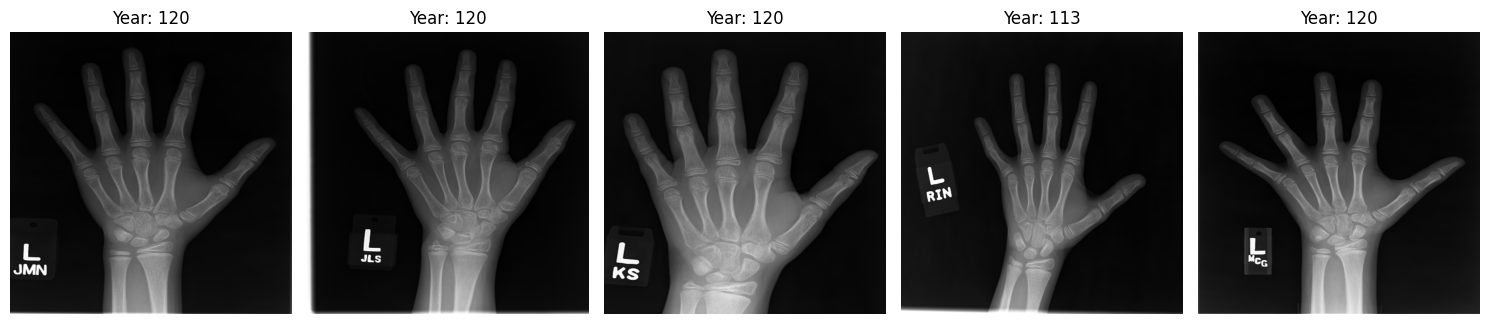

Epoch 1/10
1262/1262 [==============================] - ETA: 0s - loss: 43.4922 - mae: 43.3706       

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_01\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_01\assets


1262/1262 [==============================] - 144s 110ms/step - loss: 43.4922 - mae: 43.3706 - val_loss: 41.0178 - val_mae: 40.8956 - lr: 1.0000e-04
Epoch 2/10
1261/1262 [============================>.] - ETA: 0s - loss: 17.4588 - mae: 17.3361  

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_02\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_02\assets


1262/1262 [==============================] - 141s 111ms/step - loss: 17.4571 - mae: 17.3344 - val_loss: 39.8661 - val_mae: 39.7436 - lr: 1.0000e-04
Epoch 3/10
1261/1262 [============================>.] - ETA: 0s - loss: 15.7947 - mae: 15.6718  

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_03\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_03\assets


1262/1262 [==============================] - 143s 113ms/step - loss: 15.7935 - mae: 15.6705 - val_loss: 42.1364 - val_mae: 42.0135 - lr: 1.0000e-04
Epoch 4/10
1261/1262 [============================>.] - ETA: 0s - loss: 16.2714 - mae: 16.1482  

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_04\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_04\assets


1262/1262 [==============================] - 143s 113ms/step - loss: 16.2706 - mae: 16.1474 - val_loss: 38.1123 - val_mae: 37.9891 - lr: 1.0000e-04
Epoch 5/10
1261/1262 [============================>.] - ETA: 0s - loss: 17.6923 - mae: 17.5689  

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_05\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_05\assets


1262/1262 [==============================] - 142s 113ms/step - loss: 17.6906 - mae: 17.5672 - val_loss: 41.0444 - val_mae: 40.9212 - lr: 1.0000e-04
Epoch 6/10
1261/1262 [============================>.] - ETA: 0s - loss: 17.7638 - mae: 17.6400  

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_06\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_06\assets


1262/1262 [==============================] - 141s 112ms/step - loss: 17.7624 - mae: 17.6387 - val_loss: 38.8869 - val_mae: 38.7634 - lr: 1.0000e-04
Epoch 7/10
1261/1262 [============================>.] - ETA: 0s - loss: 18.2359 - mae: 18.1119  

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_07\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V3\keras_savedmodel_epoch_07\assets


1262/1262 [==============================] - 141s 112ms/step - loss: 18.2342 - mae: 18.1102 - val_loss: 38.4863 - val_mae: 38.3623 - lr: 5.0000e-05
Epoch 8/10
   9/1262 [..............................] - ETA: 2:02 - loss: 11.3809 - mae: 11.2569

KeyboardInterrupt: 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Paths
train_csv = r"S:\Coding\Python\MiniProject\Dataset\80_20excel\train.csv"
test_csv = r"S:\Coding\Python\MiniProject\Dataset\80_20excel\test.csv"
train_img_dir = r"S:\Coding\Python\MiniProject\Dataset\80_20image\train"
test_img_dir = r"S:\Coding\Python\MiniProject\Dataset\80_20image\test"

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Config
IMG_SIZE = (512, 512)
BATCH_SIZE = 8

# Data Pipeline (No Gender)
def build_data_pipeline(df, img_dir):
    def load_and_process(image_id, year):
        img_path = tf.strings.join([img_dir, "/", image_id, ".png"])
        image = tf.io.read_file(img_path)
        image = tf.image.decode_png(image, channels=3)
        image = tf.image.resize(image, IMG_SIZE)
        image = tf.cast(image, tf.float32) / 255.0
        return {'image_input': image}, year

    dataset = tf.data.Dataset.from_tensor_slices((
        df['id'].astype(str).values,
        df['year'].values.astype('float32')
    ))
    dataset = dataset.map(load_and_process)
    return dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_data = build_data_pipeline(train_df, train_img_dir)
test_data = build_data_pipeline(test_df, test_img_dir)

# Visualize samples
def show_sample_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, (features, label) in enumerate(dataset.unbatch().take(num_images)):
        image = features['image_input']
        year = label.numpy()
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Year: {int(year)}")
    plt.tight_layout()
    plt.show()

show_sample_images(train_data)

# Model Components
def basic_block(x):
    def stem_block(x):
        x = layers.Conv2D(32, 3, strides=2, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

        branch1 = layers.Conv2D(16, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        branch1 = layers.BatchNormalization()(branch1)
        branch1 = layers.ReLU()(branch1)
        branch1 = layers.Conv2D(32, 3, strides=2, padding='same', kernel_regularizer=regularizers.l2(1e-4))(branch1)
        branch1 = layers.BatchNormalization()(branch1)
        branch1 = layers.ReLU()(branch1)

        branch2 = layers.MaxPooling2D(2, strides=2, padding='same')(x)

        x = layers.Concatenate()([branch1, branch2])
        x = layers.Conv2D(32, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x

    def dense_block(x, k=32):
        original_input = x

        left = layers.Conv2D(2*k, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        left = layers.BatchNormalization()(left)
        left = layers.Dropout(0.1)(left)
        left = layers.ReLU()(left)
        left = layers.Conv2D(k, 3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(left)
        left = layers.BatchNormalization()(left)
        left = layers.Dropout(0.1)(left)
        left = layers.ReLU()(left)
        left = layers.Conv2D(k, 3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(left)
        left = layers.BatchNormalization()(left)
        left = layers.Dropout(0.1)(left)
        left = layers.ReLU()(left)

        right = layers.Conv2D(2*k, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        right = layers.BatchNormalization()(right)
        right = layers.Dropout(0.1)(right)
        right = layers.ReLU()(right)
        right = layers.Conv2D(k, 3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(right)
        right = layers.BatchNormalization()(right)
        right = layers.Dropout(0.1)(right)
        right = layers.ReLU()(right)

        x = layers.Concatenate()([left, right, original_input])
        return x

    def transition_layer(x):
        x = layers.Conv2D(256, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.AveragePooling2D(2)(x)
        return x

    def cbam(x, ratio=16, kernel_size=7):
        channel = x.shape[-1]
        shared_dense1 = layers.Dense(channel // ratio, activation='relu')
        shared_dense2 = layers.Dense(channel)

        avg_pool = layers.GlobalAveragePooling2D()(x)
        max_pool = layers.GlobalMaxPooling2D()(x)

        avg_pool = shared_dense2(shared_dense1(layers.Reshape((1, 1, channel))(avg_pool)))
        max_pool = shared_dense2(shared_dense1(layers.Reshape((1, 1, channel))(max_pool)))

        channel_attention = layers.Activation('sigmoid')(layers.Add()([avg_pool, max_pool]))
        channel_refined = layers.Multiply()([x, channel_attention])

        avg_spatial = tf.reduce_mean(channel_refined, axis=-1, keepdims=True)
        max_spatial = tf.reduce_max(channel_refined, axis=-1, keepdims=True)
        spatial_attention = layers.Conv2D(1, kernel_size, padding='same', activation='sigmoid')(
            layers.Concatenate()([avg_spatial, max_spatial]))

        refined = layers.Multiply()([channel_refined, spatial_attention])
        return refined

    x = stem_block(x)
    x = dense_block(x)
    x = transition_layer(x)
    x = dense_block(x)
    x = transition_layer(x)
    x = cbam(x)
    return x

# Model Definition
def YearRegressionModel(img_size=(128, 128)):
    img_input = layers.Input(shape=(*img_size, 3), name="image_input")

    x = basic_block(img_input)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    output = layers.Dense(1, activation='linear', name='year_output', kernel_regularizer=regularizers.l2(1e-4))(x)

    model = Model(inputs=img_input, outputs=output)
    return model

# Model Training
model = YearRegressionModel(img_size=IMG_SIZE)
model.compile(optimizer=Adam(0.0001), loss='mae', metrics=['mae'])

# Save Paths
base_dir = r"S:\Coding\Python\MiniProject\Models\CBAMCNN_V3"

class DualFormatSaveCallback(tf.keras.callbacks.Callback):
    def __init__(self, base_dir):
        super().__init__()
        self.base_dir = base_dir

    def on_epoch_end(self, epoch, logs=None):
        h5_path = os.path.join(self.base_dir, f"model_epoch_{epoch+1:02d}.h5")
        self.model.save(h5_path, save_format='h5')

        saved_model_path = os.path.join(self.base_dir, f"keras_savedmodel_epoch_{epoch+1:02d}")
        self.model.save(saved_model_path, save_format='tf')

# Callbacks
dual_save_callback = DualFormatSaveCallback(base_dir)
lr_scheduler = ReduceLROnPlateau(
    monitor="loss",
    factor=0.5,
    patience=3,
    min_lr=1e-5,
)

# Train
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[dual_save_callback, lr_scheduler]
)


In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers, mixed_precision
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_csv = r"S:\Coding\Python\MiniProject\Dataset\80_20excel\train.csv"
test_csv = r"S:\Coding\Python\MiniProject\Dataset\80_20excel\test.csv"
train_img_dir = r"S:\Coding\Python\MiniProject\Dataset\80_20image\train"
test_img_dir = r"S:\Coding\Python\MiniProject\Dataset\80_20image\test"

In [3]:
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [4]:
IMG_SIZE = (512, 512)
BATCH_SIZE = 8

In [5]:
def build_data_pipeline(df, img_dir):
    def load_and_process(image_id, gender, year):
        img_path = tf.strings.join([img_dir, "/", image_id, ".png"])
        image = tf.io.read_file(img_path)
        image = tf.image.decode_png(image, channels=3)
        image = tf.image.resize(image, IMG_SIZE)
        image = tf.cast(image, tf.float32) / 255.0

        demo_data = tf.expand_dims(gender, axis=-1)
        return {'image_input': image, 'demo_input': demo_data}, year

    dataset = tf.data.Dataset.from_tensor_slices((
        df['id'].astype(str).values,
        df['gender'].values.astype('float32'),
        df['year'].values.astype('float32')
    ))

    dataset = dataset.map(load_and_process)
    return dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [6]:
train_data = build_data_pipeline(train_df, train_img_dir)
test_data = build_data_pipeline(test_df, test_img_dir)

In [7]:
print(f"Total training samples: {len(train_df)}")
print(f"Total testing samples: {len(test_df)}")

Total training samples: 10089
Total testing samples: 2522


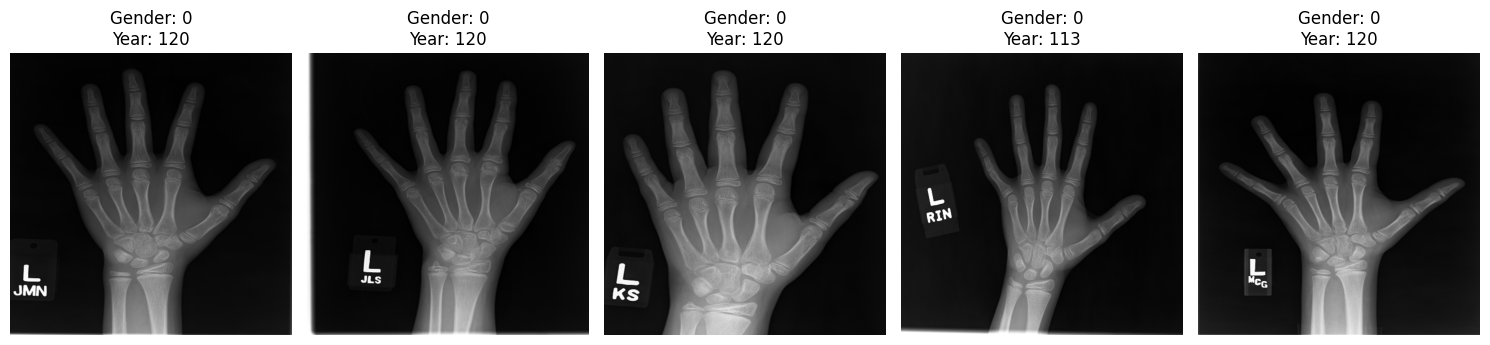

In [8]:
def show_sample_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, (features, label) in enumerate(dataset.unbatch().take(num_images)):
        image = features['image_input']
        gender = features['demo_input'].numpy().item()
        year = label.numpy()
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Gender: {int(gender)}\nYear: {int(year)}")
    plt.tight_layout()
    plt.show()

show_sample_images(train_data)

In [9]:
from tensorflow.keras import layers, Model, regularizers

def basic_block(x):
    def stem_block(x):
        x = layers.Conv2D(32, 3, strides=2, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

        branch1 = layers.Conv2D(16, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        branch1 = layers.BatchNormalization()(branch1)
        branch1 = layers.ReLU()(branch1)
        branch1 = layers.Conv2D(32, 3, strides=2, padding='same', kernel_regularizer=regularizers.l2(1e-4))(branch1)
        branch1 = layers.BatchNormalization()(branch1)
        branch1 = layers.ReLU()(branch1)

        branch2 = layers.MaxPooling2D(2, strides=2, padding='same')(x)

        x = layers.Concatenate()([branch1, branch2])
        x = layers.Conv2D(32, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x

    def dense_block(x, k=32):
        original_input = x

        left = layers.Conv2D(2*k, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        left = layers.BatchNormalization()(left)
        left = layers.Dropout(0.1)(left)
        left = layers.ReLU()(left)
        left = layers.Conv2D(k, 3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(left)
        left = layers.BatchNormalization()(left)
        left = layers.Dropout(0.1)(left)
        left = layers.ReLU()(left)
        left = layers.Conv2D(k, 3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(left)
        left = layers.BatchNormalization()(left)
        left = layers.Dropout(0.1)(left)
        left = layers.ReLU()(left)

        right = layers.Conv2D(2*k, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        right = layers.BatchNormalization()(right)
        right = layers.Dropout(0.1)(right)
        right = layers.ReLU()(right)
        right = layers.Conv2D(k, 3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(right)
        right = layers.BatchNormalization()(right)
        right = layers.Dropout(0.1)(right)
        right = layers.ReLU()(right)

        x = layers.Concatenate()([left, right, original_input])
        return x

    def transition_layer(x):
        x = layers.Conv2D(256, 1, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.AveragePooling2D(2)(x)
        return x

    def cbam(x, ratio=16, kernel_size=7):
        channel = x.shape[-1]
        shared_dense1 = layers.Dense(channel // ratio, activation='relu')
        shared_dense2 = layers.Dense(channel)

        avg_pool = layers.GlobalAveragePooling2D()(x)
        max_pool = layers.GlobalMaxPooling2D()(x)

        avg_pool = shared_dense2(shared_dense1(layers.Reshape((1, 1, channel))(avg_pool)))
        max_pool = shared_dense2(shared_dense1(layers.Reshape((1, 1, channel))(max_pool)))

        channel_attention = layers.Activation('sigmoid')(layers.Add()([avg_pool, max_pool]))
        channel_refined = layers.Multiply()([x, channel_attention])

        avg_spatial = tf.reduce_mean(channel_refined, axis=-1, keepdims=True)
        max_spatial = tf.reduce_max(channel_refined, axis=-1, keepdims=True)
        spatial_attention = layers.Conv2D(1, kernel_size, padding='same', activation='sigmoid')(
            layers.Concatenate()([avg_spatial, max_spatial]))

        refined = layers.Multiply()([channel_refined, spatial_attention])
        return refined

    x = stem_block(x)
    x = dense_block(x)
    x = transition_layer(x)
    x = dense_block(x)
    x = transition_layer(x)
    x = cbam(x)
    return x

def YearRegressionModel(img_size=(128, 128)):
    img_input = layers.Input(shape=(*img_size, 3), name="image_input")

    x = basic_block(img_input)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    output = layers.Dense(1, activation='linear', name='year_output', kernel_regularizer=regularizers.l2(1e-4))(x)

    model = Model(inputs=img_input, outputs=output)
    return model

In [10]:
model = YearRegressionModel(img_size=IMG_SIZE)
model.compile(optimizer=Adam(0.0001), loss='mae', metrics=['mae'])

In [11]:
base_dir = r"S:\Coding\Python\MiniProject\Models\CBAMCNN_V3"


class DualFormatSaveCallback(tf.keras.callbacks.Callback):
    def __init__(self, base_dir):
        super().__init__()
        self.base_dir = base_dir

    def on_epoch_end(self, epoch, logs=None):
        h5_path = os.path.join(self.base_dir, f"model_epoch_{epoch+1:02d}.h5")
        self.model.save(h5_path, save_format='h5')

        saved_model_path = os.path.join(self.base_dir, f"keras_savedmodel_epoch_{epoch+1:02d}")
        self.model.save(saved_model_path, save_format='tf')

dual_save_callback = DualFormatSaveCallback(base_dir)

In [12]:
initial_lr = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
lr_scheduler = ReduceLROnPlateau(
    monitor="loss",
    factor=0.5,
    patience=3,
    min_lr=1e-5,
)

In [13]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[dual_save_callback,lr_scheduler]
)

Epoch 1/10
1262/1262 [==============================] - ETA: 0s - loss: 41.9542 - mae: 41.8307       

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V2\keras_savedmodel_epoch_01\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V2\keras_savedmodel_epoch_01\assets


1262/1262 [==============================] - 147s 112ms/step - loss: 41.9542 - mae: 41.8307 - val_loss: 41.4383 - val_mae: 41.3148 - lr: 1.0000e-04
Epoch 2/10
1261/1262 [============================>.] - ETA: 0s - loss: 17.4819 - mae: 17.3579   

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V2\keras_savedmodel_epoch_02\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V2\keras_savedmodel_epoch_02\assets


1262/1262 [==============================] - 143s 113ms/step - loss: 17.4802 - mae: 17.3563 - val_loss: 38.9145 - val_mae: 38.7910 - lr: 1.0000e-04
Epoch 3/10
1261/1262 [============================>.] - ETA: 0s - loss: 17.2218 - mae: 17.0977  

INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V2\keras_savedmodel_epoch_03\assets


INFO:tensorflow:Assets written to: S:\Coding\Python\MiniProject\Models\CBAMCNN_V2\keras_savedmodel_epoch_03\assets


1262/1262 [==============================] - 141s 112ms/step - loss: 17.2201 - mae: 17.0960 - val_loss: 39.4148 - val_mae: 39.2908 - lr: 1.0000e-04
Epoch 4/10
  43/1262 [>.............................] - ETA: 1:59 - loss: 4.9139 - mae: 4.7898  

KeyboardInterrupt: 